# Import training data

In [46]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import csv
import pandas as pd

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
from sklearn.inspection import permutation_importance





In [48]:
filename_train = "AppML_InitialProject_train.csv"
filename_clf = "AppML_InitialProject_test_classification.csv"
filename_reg = "AppML_InitialProject_test_regression.csv"
filename_clust = "AppML_InitialProject_test_clustering.csv"
path_data = '../../Data_files_initial_project/'


df = pd.read_csv(path_data + filename_train)

df_test_clf = pd.read_csv(path_data + filename_clf)
df_test_clf_norm = StandardScaler().fit_transform(df_test_clf)
df_test_reg = pd.read_csv(path_data + filename_reg)
df_test_reg_norm = StandardScaler().fit_transform(df_test_reg)
df_test_clust = pd.read_csv(path_data + filename_clust)
df_test_clust_norm = StandardScaler().fit_transform(df_test_clust)

print(df.head())

   averageInteractionsPerCrossing   p_Rhad1    p_Rhad      p_f3   p_weta2  \
0                           55.50 -0.002390 -0.003614  0.000744  0.010088   
1                           33.50 -0.009279 -0.010666  0.003784  0.011625   
2                           35.50  0.002806  0.013643  0.025505  0.010330   
3                           40.49 -0.001910  0.000044  0.000176  0.010323   
4                           52.50  0.013779 -0.002106  0.010156  0.010096   

     p_Rphi    p_Reta  p_Eratio      p_f1  p_TRTPID  ...  pX_E7x11_Lr2  \
0  0.947685  0.983722  0.969448  0.355275 -0.030026  ...     27951.328   
1  0.922366  0.955934  0.918366  0.397633  0.335419  ...     34642.820   
2  0.969845  0.945576  0.921568  0.077971  0.517517  ...     88892.890   
3  0.923816  0.888029  0.000000  0.000000  0.133801  ...     39768.450   
4  0.899883  0.717177  0.782584  0.253658 -0.044038  ...     15531.818   

   pX_E7x11_Lr3  pX_E7x7_Lr0  pX_E7x7_Lr1  p_pt_track     p_eta     p_phi  \
0    473.046360

# dividing data in to validation, training data

In [64]:
df_valid, df_train = sk.model_selection.train_test_split(df, test_size=0.9, random_state=42, shuffle=True)

print(df_train.keys())

df_train_Y_clf = df_train['p_Truth_isElectron']
df_train_Y_clf_norm = StandardScaler().fit_transform(np.array([df_train_Y_clf]).reshape(-1, 1))
df_train_X_clf = df_train.drop(['p_Truth_isElectron', 'p_Truth_Energy'], axis=1)
df_train_X_clf_norm = StandardScaler().fit_transform(df_train_X_clf)

df_train_Y_reg = df_train['p_Truth_Energy']
df_train_Y_reg_norm = StandardScaler().fit_transform(np.array([df_train_Y_reg]).reshape(-1, 1))
df_train_X_reg = df_train.drop(['p_Truth_isElectron', 'p_Truth_Energy'], axis=1)
df_train_X_reg_norm = StandardScaler().fit_transform(df_train_X_reg)

df_train_Y_clust = df_train['p_Truth_isElectron']
df_train_Y_clust_norm = StandardScaler().fit_transform(np.array([df_train_Y_clust]).reshape(-1, 1))
df_train_X_clust = df_train.drop(['p_Truth_isElectron', 'p_Truth_Energy'], axis=1)
df_train_X_clust_norm = StandardScaler().fit_transform(df_train_X_clust)


df_valid_Y_clf = df_valid['p_Truth_isElectron']
df_valid_Y_clf_norm = StandardScaler().fit_transform(np.array([df_valid_Y_clf]).reshape(-1, 1))
df_valid_X_clf = df_valid.drop(['p_Truth_isElectron', 'p_Truth_Energy'], axis=1)
df_valid_X_clf_norm = StandardScaler().fit_transform(df_valid_X_clf)

df_valid_Y_reg = df_valid['p_Truth_Energy']
df_valid_Y_reg_norm = StandardScaler().fit_transform(np.array([df_valid_Y_reg]).reshape(-1, 1))
df_valid_X_reg = df_valid.drop(['p_Truth_isElectron', 'p_Truth_Energy'], axis=1)
df_valid_X_reg_norm = StandardScaler().fit_transform(df_valid_X_reg)

df_valid_Y_clust = df_valid['p_Truth_isElectron']
df_valid_Y_clust_norm = StandardScaler().fit_transform(np.array([df_valid_Y_clust]).reshape(-1, 1))
df_valid_X_clust = df_valid.drop(['p_Truth_isElectron', 'p_Truth_Energy'], axis=1)
df_valid_X_clust_norm = StandardScaler().fit_transform(df_valid_X_clust)




df_test_X_clf = df_test_clf
df_test_X_clf_norm = StandardScaler().fit_transform(df_test_X_clf)


df_test_X_reg = df_test_reg
df_test_X_reg_norm = StandardScaler().fit_transform(df_test_X_reg)

df_test_X_clust = df_test_clust
df_test_X_clust_norm = StandardScaler().fit_transform(df_test_X_clust)





Index(['averageInteractionsPerCrossing', 'p_Rhad1', 'p_Rhad', 'p_f3',
       'p_weta2', 'p_Rphi', 'p_Reta', 'p_Eratio', 'p_f1', 'p_TRTPID',
       ...
       'pX_E7x11_Lr2', 'pX_E7x11_Lr3', 'pX_E7x7_Lr0', 'pX_E7x7_Lr1',
       'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_Truth_isElectron',
       'p_Truth_Energy'],
      dtype='object', length=142)


## Balance of dataset

In [65]:
print(df_train['p_Truth_isElectron'].value_counts())

0    128042
1     33958
Name: p_Truth_isElectron, dtype: int64


The dataset is not ballanced, think about doing something about this

# XGBoost

## Classification

In [57]:
def roc_curve(y_true, y_false, thresholds):
    @np.vectorize
    def roc_curve_func(thresholds):
        mask_true_positive = thresholds < y_true
        mask_true_negative = thresholds > y_false
        mask_false_positive = thresholds < y_false
        mask_false_negative = thresholds > y_true

        y_total_threshold_positive = np.sum(mask_true_positive) + np.sum(mask_false_positive)
        y_total_threshold_negative = np.sum(mask_true_negative) + np.sum(mask_false_negative)

        roc_curve = np.zeros(2)
        roc_curve[0] = np.sum(mask_true_positive) / y_total_threshold_positive
        roc_curve[1] = np.sum(mask_false_positive) / y_total_threshold_negative
        


        
        return roc_curve[0], roc_curve[1]
    return roc_curve_func(thresholds)

def plot_roc_curve(y_true, y_false, thresholds):
    roc_curve_points = roc_curve(y_true, y_false, thresholds)
    plt.plot(thresholds, roc_curve_points[0])
    plt.plot(thresholds, roc_curve_points[1])
    plt.xlabel('Threshold')
    plt.ylabel('ROC Curve')

    plt.show()



    

/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:17:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


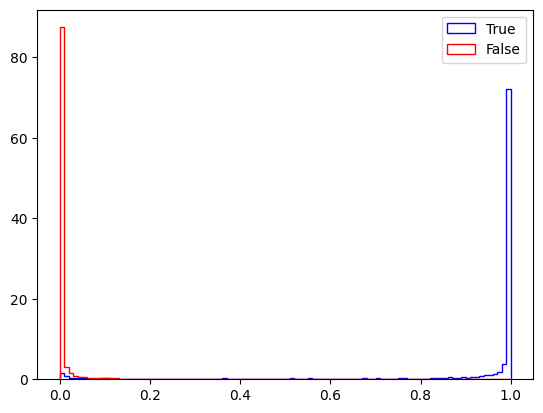

0.09377357953827765


In [66]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

bst = XGBClassifier(n_estimators=10, max_depth=10, learning_rate=1, objective='binary:logistic')

bst.fit(df_train_X_clf, df_train_Y_clf)

preds = bst.predict_proba(df_valid_X_clf)

#print(preds)

fig, ax = plt.subplots()

preds_true = preds[df_valid_Y_clf == 1][:, 1]
preds_false = preds[df_valid_Y_clf == 0][:, 1]

ax.hist(preds_true, bins=100, range=(0,1), histtype='step', color='b', label='True', density=True)
ax.hist(preds_false, bins=100, range=(0,1), histtype='step', color='r', label='False', density=True)

plt.legend()

plt.show()

#plot_roc_curve(preds_true, preds_false, np.linspace(0, 1, 100))


log_log_clf_XGB = log_loss(df_valid_Y_clf, preds)

print(log_log_clf_XGB)

## Permutation importance

In [59]:
r = permutation_importance(bst, df_valid_X_clf, df_valid_Y_clf, n_repeats=50, random_state=0)



/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and wil

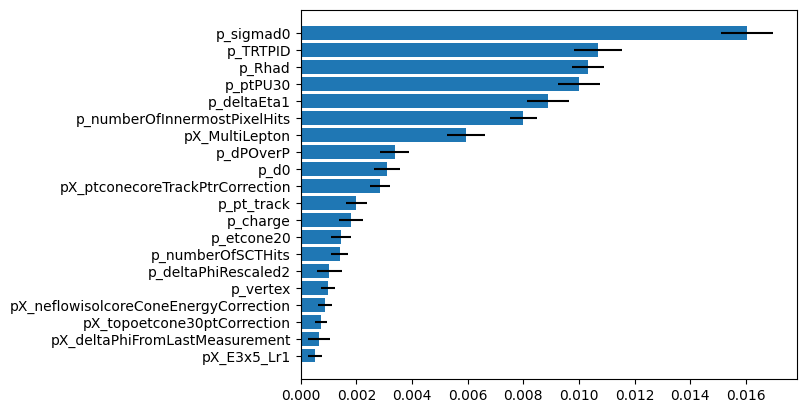

In [60]:
fig, ax = plt.subplots()
feature_nr = 20
importance_sorted_idx = abs(r.importances_mean).argsort()
importance_mean = r.importances_mean[importance_sorted_idx]
importance_std = r.importances_std[importance_sorted_idx]
feature_names = df_valid_X_clf.columns[importance_sorted_idx]
ax.barh(feature_names[-feature_nr:], importance_mean[-feature_nr:], xerr=importance_std[-feature_nr:])
plt.show()

clf_feature_list = feature_names[-feature_nr:]

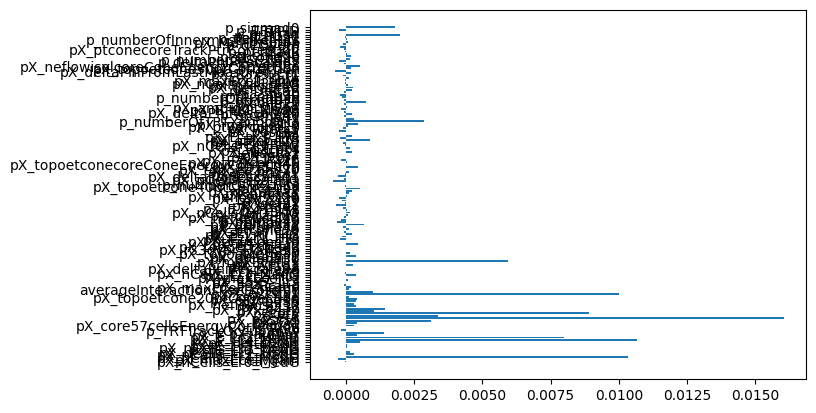

In [61]:
fig, ax = plt.subplots()
ax.barh(feature_names, r.importances_mean)
plt.show()

## SHAP values

In [11]:
import shap


## Chossing the 20 features

In [76]:
df_train_X_clf_final = df_train_X_clf[clf_feature_list]
df_valid_X_clf_final = df_valid_X_clf[clf_feature_list]
df_test_X_clf_final = df_test_X_clf[clf_feature_list]

df_train_X_clf_final_norm = StandardScaler().fit_transform(df_train_X_clf_final)
df_valid_X_clf_final_norm = StandardScaler().fit_transform(df_valid_X_clf_final)
df_test_X_clf_final_norm = StandardScaler().fit_transform(df_test_X_clf_final)

df_train_Y_clf_final = df_train_Y_clf
df_valid_Y_clf_final = df_valid_Y_clf

df_train_Y_clf_final_norm = StandardScaler().fit_transform(np.array([df_train_Y_clf_final]).reshape(-1, 1))
df_valid_Y_clf_final_norm = StandardScaler().fit_transform(np.array([df_valid_Y_clf_final]).reshape(-1, 1))


# 20 best variables

/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:22:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


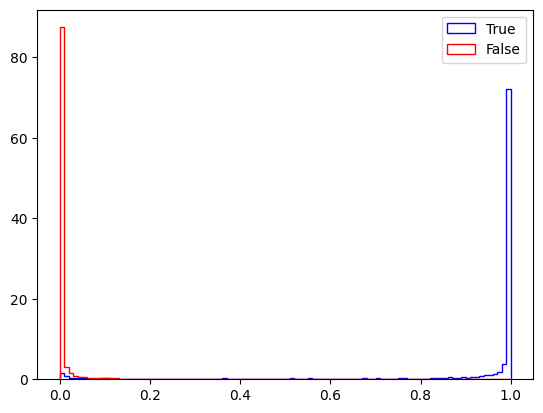

0.09377357953827765


In [68]:
bst = XGBClassifier(n_estimators=10, max_depth=10, learning_rate=1, objective='binary:logistic')

bst.fit(df_train_X_clf, df_train_Y_clf)

preds = bst.predict_proba(df_valid_X_clf)

#print(preds)

fig, ax = plt.subplots()

preds_true = preds[df_valid_Y_clf == 1][:, 1]
preds_false = preds[df_valid_Y_clf == 0][:, 1]

ax.hist(preds_true, bins=100, range=(0,1), histtype='step', color='b', label='True', density=True)
ax.hist(preds_false, bins=100, range=(0,1), histtype='step', color='r', label='False', density=True)

plt.legend()

plt.show()

#plot_roc_curve(preds_true, preds_false, np.linspace(0, 1, 100))


log_log_clf_XGB = log_loss(df_valid_Y_clf, preds)

print(log_log_clf_XGB)

# Hyperperameter optimazation XGBoost classification

## BOHB

In [70]:
import optuna


def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 1, 100),
        'max_depth': trial.suggest_int('max_depth', 1, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'gamma': trial.suggest_float('gamma', 0.1, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1),
        'objective': 'binary:logistic'
    }
    bst = XGBClassifier(**param)
    bst.fit(df_train_X_clf_final, df_train_Y_clf_final)
    preds = bst.predict_proba(df_valid_X_clf_final)
    log_log_clf_XGB = log_loss(df_valid_Y_clf_final, preds)
    return log_log_clf_XGB

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2024-05-15 11:28:38,512] A new study created in memory with name: no-name-c6fdf5ed-7360-4720-8404-86c1225b7c36


  0%|          | 0/20 [00:00<?, ?it/s]

/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:28:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:28:54,650] Trial 0 finished with value: 0.07591201798050659 and parameters: {'n_estimators': 33, 'max_depth': 41, 'learning_rate': 0.3384321671602439, 'subsample': 0.5998823550069078, 'colsample_bytree': 0.9261278916418817, 'gamma': 0.7182694558958526, 'reg_alpha': 0.7596925485780895, 'reg_lambda': 0.9899995095606161}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:28:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:29:05,675] Trial 1 finished with value: 0.10194142686730048 and parameters: {'n_estimators': 46, 'max_depth': 72, 'learning_rate': 0.6628779397688486, 'subsample': 0.5438082453980976, 'colsample_bytree': 0.3830649705055672, 'gamma': 0.6854199168925456, 'reg_alpha': 0.5345206458292917, 'reg_lambda': 0.8356932318388207}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:29:33,320] Trial 2 finished with value: 0.10956376417774404 and parameters: {'n_estimators': 88, 'max_depth': 96, 'learning_rate': 0.5943150164838105, 'subsample': 0.47972482534614513, 'colsample_bytree': 0.8168970078151775, 'gamma': 0.7436419780124488, 'reg_alpha': 0.4458047835221495, 'reg_lambda': 0.5012755176918591}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:29:47,709] Trial 3 finished with value: 0.07689013752159349 and parameters: {'n_estimators': 34, 'max_depth': 30, 'learning_rate': 0.3655564702096715, 'subsample': 0.7519483048740686, 'colsample_bytree': 0.6817979837874889, 'gamma': 0.9702102435851384, 'reg_alpha': 0.570175926310876, 'reg_lambda': 0.593679742853427}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:29:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:30:03,558] Trial 4 finished with value: 0.130193695141024 and parameters: {'n_estimators': 75, 'max_depth': 97, 'learning_rate': 0.7943565676153744, 'subsample': 0.6197730131349152, 'colsample_bytree': 0.19302097869510043, 'gamma': 0.4715924739399392, 'reg_alpha': 0.4959967330181114, 'reg_lambda': 0.4063274176418039}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:30:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:30:12,902] Trial 5 finished with value: 0.11329123105911261 and parameters: {'n_estimators': 43, 'max_depth': 82, 'learning_rate': 0.8507822380153209, 'subsample': 0.8446299503982742, 'colsample_bytree': 0.22540073792872123, 'gamma': 0.897951841984708, 'reg_alpha': 0.5701876828529852, 'reg_lambda': 0.22746006066928548}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:30:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:30:17,304] Trial 6 finished with value: 0.19694453266988893 and parameters: {'n_estimators': 32, 'max_depth': 11, 'learning_rate': 0.056330356326438555, 'subsample': 0.8663868169983645, 'colsample_bytree': 0.27859939295012126, 'gamma': 0.47842387037236633, 'reg_alpha': 0.7767892915300442, 'reg_lambda': 0.4198717030900515}. Best is trial 0 with value: 0.07591201798050659.
[11:30:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[I 2024-05-15 11:30:17,562] Trial 7 finished with value: 0.3191624747578933 and parameters: {'n_estimators': 5, 'max_depth': 1, 'learning_rate': 0.24482715778234274, 'subsample': 0.633412961245201, 'colsample_bytree': 0.9255710380563347, 'gamma': 0.9571433825258481, 'reg_alpha': 0.47988611492893485, 'reg_lambda': 0.13656506967613102}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:30:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:30:32,367] Trial 8 finished with value: 0.11819674276082083 and parameters: {'n_estimators': 60, 'max_depth': 58, 'learning_rate': 0.8636647184721442, 'subsample': 0.9136913377479778, 'colsample_bytree': 0.1242861751954291, 'gamma': 0.3079655845260202, 'reg_alpha': 0.993869486144804, 'reg_lambda': 0.437004037457823}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:30:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:30:42,636] Trial 9 finished with value: 0.08079939089986687 and parameters: {'n_estimators': 17, 'max_depth': 69, 'learning_rate': 0.4184743492666028, 'subsample': 0.7159042658293371, 'colsample_bytree': 0.9708979258998325, 'gamma': 0.1525919706910103, 'reg_alpha': 0.5177351143970426, 'reg_lambda': 0.8302691439295129}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:30:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:31:07,124] Trial 10 finished with value: 0.18181100610037224 and parameters: {'n_estimators': 100, 'max_depth': 36, 'learning_rate': 0.01589313421801375, 'subsample': 0.23050507878338822, 'colsample_bytree': 0.5309708168490748, 'gamma': 0.6924586942183888, 'reg_alpha': 0.1664857941860114, 'reg_lambda': 0.9994509901347517}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:31:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:31:16,605] Trial 11 finished with value: 0.08522067251046335 and parameters: {'n_estimators': 29, 'max_depth': 33, 'learning_rate': 0.4013783062292177, 'subsample': 0.3757087311116747, 'colsample_bytree': 0.71366953269193, 'gamma': 0.8243306573559835, 'reg_alpha': 0.7872803035492875, 'reg_lambda': 0.7195344860788748}. Best is trial 0 with value: 0.07591201798050659.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:31:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:31:40,272] Trial 12 finished with value: 0.0719477428550458 and parameters: {'n_estimators': 61, 'max_depth': 34, 'learning_rate': 0.2530140401557854, 'subsample': 0.766295708148316, 'colsample_bytree': 0.6521104315344417, 'gamma': 0.9829330201484112, 'reg_alpha': 0.7216718012441085, 'reg_lambda': 0.6771592846514035}. Best is trial 12 with value: 0.0719477428550458.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:31:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:31:54,807] Trial 13 finished with value: 0.0768149504024876 and parameters: {'n_estimators': 65, 'max_depth': 47, 'learning_rate': 0.22169180454144322, 'subsample': 0.36296537131812157, 'colsample_bytree': 0.540776589297634, 'gamma': 0.5836293456898893, 'reg_alpha': 0.796607553071568, 'reg_lambda': 0.9893178690540846}. Best is trial 12 with value: 0.0719477428550458.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:31:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:32:19,578] Trial 14 finished with value: 0.06993971056937434 and parameters: {'n_estimators': 56, 'max_depth': 19, 'learning_rate': 0.21284004034442627, 'subsample': 0.9943341082252157, 'colsample_bytree': 0.8007947563911424, 'gamma': 0.7996343809067612, 'reg_alpha': 0.9152231244439238, 'reg_lambda': 0.6894846736728771}. Best is trial 14 with value: 0.06993971056937434.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:32:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:32:41,257] Trial 15 finished with value: 0.06881279029641248 and parameters: {'n_estimators': 59, 'max_depth': 14, 'learning_rate': 0.1610762107591303, 'subsample': 0.9982458930366874, 'colsample_bytree': 0.7210731602555085, 'gamma': 0.8460093455459115, 'reg_alpha': 0.9679027540429661, 'reg_lambda': 0.6370017328968134}. Best is trial 15 with value: 0.06881279029641248.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:32:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:33:24,061] Trial 16 finished with value: 0.0687019475785296 and parameters: {'n_estimators': 79, 'max_depth': 19, 'learning_rate': 0.13727677392727716, 'subsample': 0.9930000307471687, 'colsample_bytree': 0.8078382009374928, 'gamma': 0.8390269685263814, 'reg_alpha': 0.9948977592461044, 'reg_lambda': 0.6013399887018396}. Best is trial 16 with value: 0.0687019475785296.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:33:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:33:43,740] Trial 17 finished with value: 0.07713657212399107 and parameters: {'n_estimators': 78, 'max_depth': 20, 'learning_rate': 0.0716046012623443, 'subsample': 0.9847336318935389, 'colsample_bytree': 0.4340032437737242, 'gamma': 0.5761323375043108, 'reg_alpha': 0.9884156350203526, 'reg_lambda': 0.2987261594764781}. Best is trial 16 with value: 0.0687019475785296.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:33:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:33:50,860] Trial 18 finished with value: 0.07289359429721994 and parameters: {'n_estimators': 76, 'max_depth': 8, 'learning_rate': 0.13920176473970464, 'subsample': 0.13391172477107133, 'colsample_bytree': 0.8068934587705566, 'gamma': 0.8591148710304266, 'reg_alpha': 0.8877184414213984, 'reg_lambda': 0.5834250190355146}. Best is trial 16 with value: 0.0687019475785296.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:33:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[I 2024-05-15 11:34:22,202] Trial 19 finished with value: 0.08672673140942994 and parameters: {'n_estimators': 95, 'max_depth': 23, 'learning_rate': 0.5630304949544435, 'subsample': 0.9121127607788986, 'colsample_bytree': 0.6217013201827454, 'gamma': 0.32012052141721276, 'reg_alpha': 0.2908487759522179, 'reg_lambda': 0.8058291142774379}. Best is trial 16 with value: 0.0687019475785296.


In [71]:
# To see all info at the best trial use:
study.best_trial

# To print metric values for all trials:
study.best_trial.intermediate_values

# To see distributions from which optuna samples parameters:
study.best_trial.distributions

{'n_estimators': IntDistribution(high=100, log=False, low=1, step=1),
 'max_depth': IntDistribution(high=100, log=False, low=1, step=1),
 'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None),
 'subsample': FloatDistribution(high=1.0, log=False, low=0.1, step=None),
 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.1, step=None),
 'gamma': FloatDistribution(high=1.0, log=False, low=0.1, step=None),
 'reg_alpha': FloatDistribution(high=1.0, log=False, low=0.1, step=None),
 'reg_lambda': FloatDistribution(high=1.0, log=False, low=0.1, step=None)}

In [72]:
# To simply get the optimized parameters:
clf_hyperperam_opt = study.best_trial.params

## Random searh

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, poisson




parameters_RandomSearch = {'max_depth': poisson(25), 
                           'min_samples_leaf': randint(1, 100)}
n_iter_search = 9

RandomSearch = RandomizedSearchCV(bst, 
                                  param_distributions=parameters_RandomSearch, 
                                  n_iter=n_iter_search, 
                                  cv=5, 
                                  return_train_score=True,
                                  random_state=42,
                                 )

RandomSearch.fit(df_valid_X_clf, df_valid_Y_clf);

RandomSearch_results = pd.DataFrame(RandomSearch.cv_results_)                 
print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.3f}")

/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:22:54] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:55] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:55] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:55] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:56] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:56] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:56] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:57] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:57] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:58] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:58] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:58] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:59] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:59] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:22:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:22:59] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:00] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:00] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:01] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:01] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:02] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:02] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:02] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:03] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:03] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:04] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:04] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:05] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:05] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:05] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:06] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:06] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:07] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:07] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:08] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:08] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:09] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:09] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:10] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:10] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:11] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:11] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:12] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:12] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:13] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:13] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(da

[14:23:14] WARNING: ../src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:23:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Random Search: 	Best parameters:  {'max_depth': 23, 'min_samples_leaf': 72} , Best scores: 0.949


# Neural Network

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


 
# Create a NN. Loss function is BinaryCrossEntropy. Output layer has 1 node;the prediction for isb. Learning rate defaults to 0.001. 
model = Sequential([
    Dense(20,activation='relu',name='input_layer'),
    Dense(24,activation='relu',name='hidden_layer1'),
    Dense(20,activation='relu',name='hidden_layer2'),
    Dense(12,activation='relu',name='hidden_layer3'),
    Dense(8,activation='relu',name='hidden_layer4'),
    Dense(1, activation='sigmoid', name='output')])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.losses.BinaryCrossentropy()])

print('--------- TRAINING ---------')
history = model.fit(x = np.array(df_train_X_clf_final_norm), y = np.array(df_train_Y_clf_final_norm), validation_data=(np.array(df_valid_X_clf_final_norm), np.array(df_valid_Y_clf_final_norm)), epochs = 25)  
## This trains the model on input_train by comparing to the true values in truth_train. After every epoch of training, the model is evaluated on the validation dataset, 
## namely input_valid and truth_valid.

--------- TRAINING ---------
Epoch 1/25
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - binary_crossentropy: -1977631104.0000 - loss: -1977629568.0000 - val_binary_crossentropy: -68649000960.0000 - val_loss: -68636917760.0000
Epoch 2/25
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - binary_crossentropy: -233519022080.0000 - loss: -233518972928.0000 - val_binary_crossentropy: -1581580943360.0000 - val_loss: -1581306740736.0000
Epoch 3/25
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - binary_crossentropy: -2790165839872.0000 - loss: -2790165839872.0000 - val_binary_crossentropy: -10014917918720.0000 - val_loss: -10013189865472.0000
Epoch 4/25
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - binary_crossentropy: -14425582993408.0000 - loss: -14425584041984.0000 - val_binary_crossentropy: -38280590524416.0000 - val_loss: -38274009661440.0000
Epoch 5/25
5063/5063 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - binary_crossentropy: -49774069809152.0000 - loss: -49774069809152.0000 - val_binary_crossentropy: -1

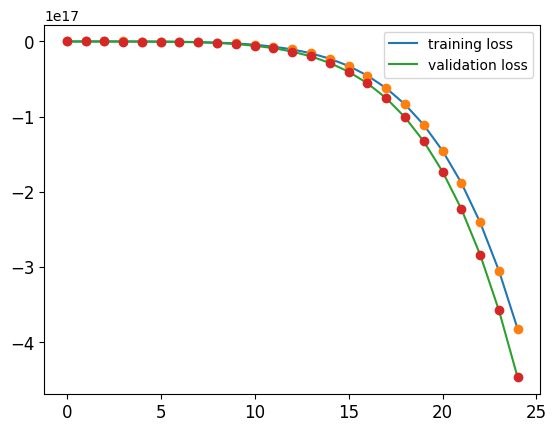

In [78]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig =  plt.figure()
plt.plot(training_loss,label = 'training loss')
plt.plot(training_loss,'o')
plt.plot(validation_loss, label = 'validation loss')
plt.plot(validation_loss, 'o')
plt.legend()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

# Regression

## using only true electrons

In [ ]:
df_reg = df[df['p_Truth_isElectron'] == 1]
df_rest_reg, df_test_reg = sk.model_selection.train_test_split(df_reg, test_size=0.1, random_state=42, shuffle=True)
df_train_reg, df_valid_reg = sk.model_selection.train_test_split(df_rest_reg, test_size=0.1, random_state=42, shuffle=True)
print(df_train.keys())

df_train_Y_reg = df_train_reg['p_Truth_Energy']
df_train_X_reg = df_train_reg.drop('p_Truth_isElectron', axis=1)
df_train_X_reg = df_train_X_reg.drop('p_Truth_Energy', axis=1)

df_valid_Y_reg = df_valid_reg['p_Truth_Energy']
df_valid_X_reg = df_valid_reg.drop('p_Truth_isElectron', axis=1)
df_valid_X_reg = df_valid_X_reg.drop('p_Truth_Energy', axis=1)

df_test_Y_reg = df_test_reg['p_Truth_Energy']
df_test_X_reg = df_test_reg.drop('p_Truth_isElectron', axis=1)
df_test_X_reg = df_test_X_reg.drop('p_Truth_Energy', axis=1)



def Mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)/y_true)

Index(['averageInteractionsPerCrossing', 'p_Rhad1', 'p_Rhad', 'p_f3',
       'p_weta2', 'p_Rphi', 'p_Reta', 'p_Eratio', 'p_f1', 'p_TRTPID',
       ...
       'pX_E7x11_Lr2', 'pX_E7x11_Lr3', 'pX_E7x7_Lr0', 'pX_E7x7_Lr1',
       'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_Truth_isElectron',
       'p_Truth_Energy'],
      dtype='object', length=142)


## Training

/home/sk0rt3/anaconda3/lib/python3.11/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


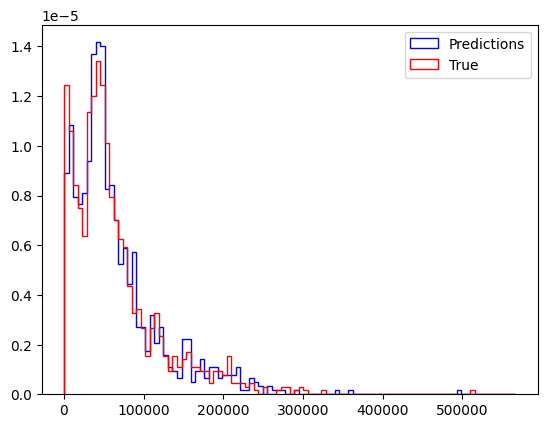

In [ ]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=1)#, objective='reg:absoluteerror')
reg.fit(df_train_X_reg, df_train_Y_reg)

reg_preds = reg.predict(df_valid_X_reg)

#print(Mean_absolute_error(df_valid_Y_reg, reg_preds))

xmin, xmax = np.min(df_valid_Y_reg) * 0.9, np.max(df_valid_Y_reg) * 1.1

fig, ax = plt.subplots()
ax.hist(reg_preds, bins=100, range=(xmin, xmax), histtype='step', color='b', label='Predictions', density=True)
ax.hist(df_valid_Y_reg, bins=100, range=(xmin, xmax), histtype='step', color='r', label='True', density=True)
plt.legend()
plt.show()



# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import log_loss
filename = 'AppML_InitialProject_test_clustering.h5'
path_data = '../../Data_files_initial_project/'


df_cluster = pd.read_hdf(path_data + filename)

print(df_cluster.head())

   averageInteractionsPerCrossing   p_Rhad1    p_Rhad      p_f3   p_weta2  \
0                       37.500000  0.025947  0.024349  0.007803  0.010298   
1                       42.490002 -0.006902 -0.006811  0.010393  0.012311   
2                       52.500000  0.013704  0.013265  0.007387  0.010185   
3                       28.500000  0.000785  0.000647  0.004110  0.009437   
4                       29.490000  0.136535  0.200039  0.006466  0.009753   

     p_Rphi    p_Reta  p_Eratio      p_f1  p_TRTPID  ...  pX_E7x11_Lr0  \
0  0.913766  0.951225  0.941106  0.414028 -0.004351  ...   2407.802979   
1  0.925067  0.925363  0.799748  0.383556  0.167152  ...  14937.647461   
2  0.913089  0.955989  0.982069  0.286549  0.274893  ...   6095.382324   
3  0.975031  0.977527  0.926579  0.299125  0.002612  ...   1364.262695   
4  0.946700  0.948462  0.876375  0.128385  0.214403  ...   1119.878540   

   pX_E7x11_Lr1  pX_E7x11_Lr2  pX_E7x11_Lr3   pX_E7x7_Lr0   pX_E7x7_Lr1  \
0  17535.363281  

## K-means

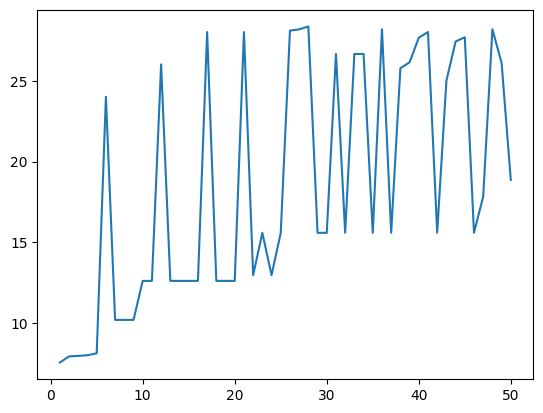

In [ ]:
cluster_score = np.zeros(25)
n_cluster_min = 3
n_cluster_max = 25
cluster_score = np.zeros(n_cluster_max - n_cluster_min + 1)
for i in range(1, len(cluster_score)+1):
    cluster = KMeans(n_clusters=i)

    cluster.fit(df.drop('p_Truth_isElectron', axis=1))

    cluster_score[i-1] = log_loss(df['p_Truth_isElectron'], cluster.predict(df.drop('p_Truth_isElectron', axis=1)))


fig, ax = plt.subplots()
ax.plot(np.arange(1, len(cluster_score) + 1), cluster_score)
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
df_norm_DBS = 

cluster = DBSCAN(eps=0.5, min_samples=5).fit(df.drop('p_Truth_isElectron', axis=1))
print(cluster.n_features_in_)



[]


## PCA

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(max_iter=20000,
                    n_iter_no_change=100,           # Number of iterations without improvement before stopping
                    solver='adam',                  # Standard for minimising
                    activation='logistic',          # Standard function (but slightly slower)
                    hidden_layer_sizes=(10, 10),    # Size of network (same as ALEPH)
                    learning_rate='invscaling',     # Other options are "constant" and "adaptive"
                    random_state=42)

clf.fit(df_train_X, df_train_Y)


y_score_MLP = clf.predict_proba(df_valid_X)